In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("../processed_data.csv")

Definisanje opsega eps i min_samples


In [38]:
eps_values = [2, 4, 5.5]
min_samples_values = [10, 100 ,500]

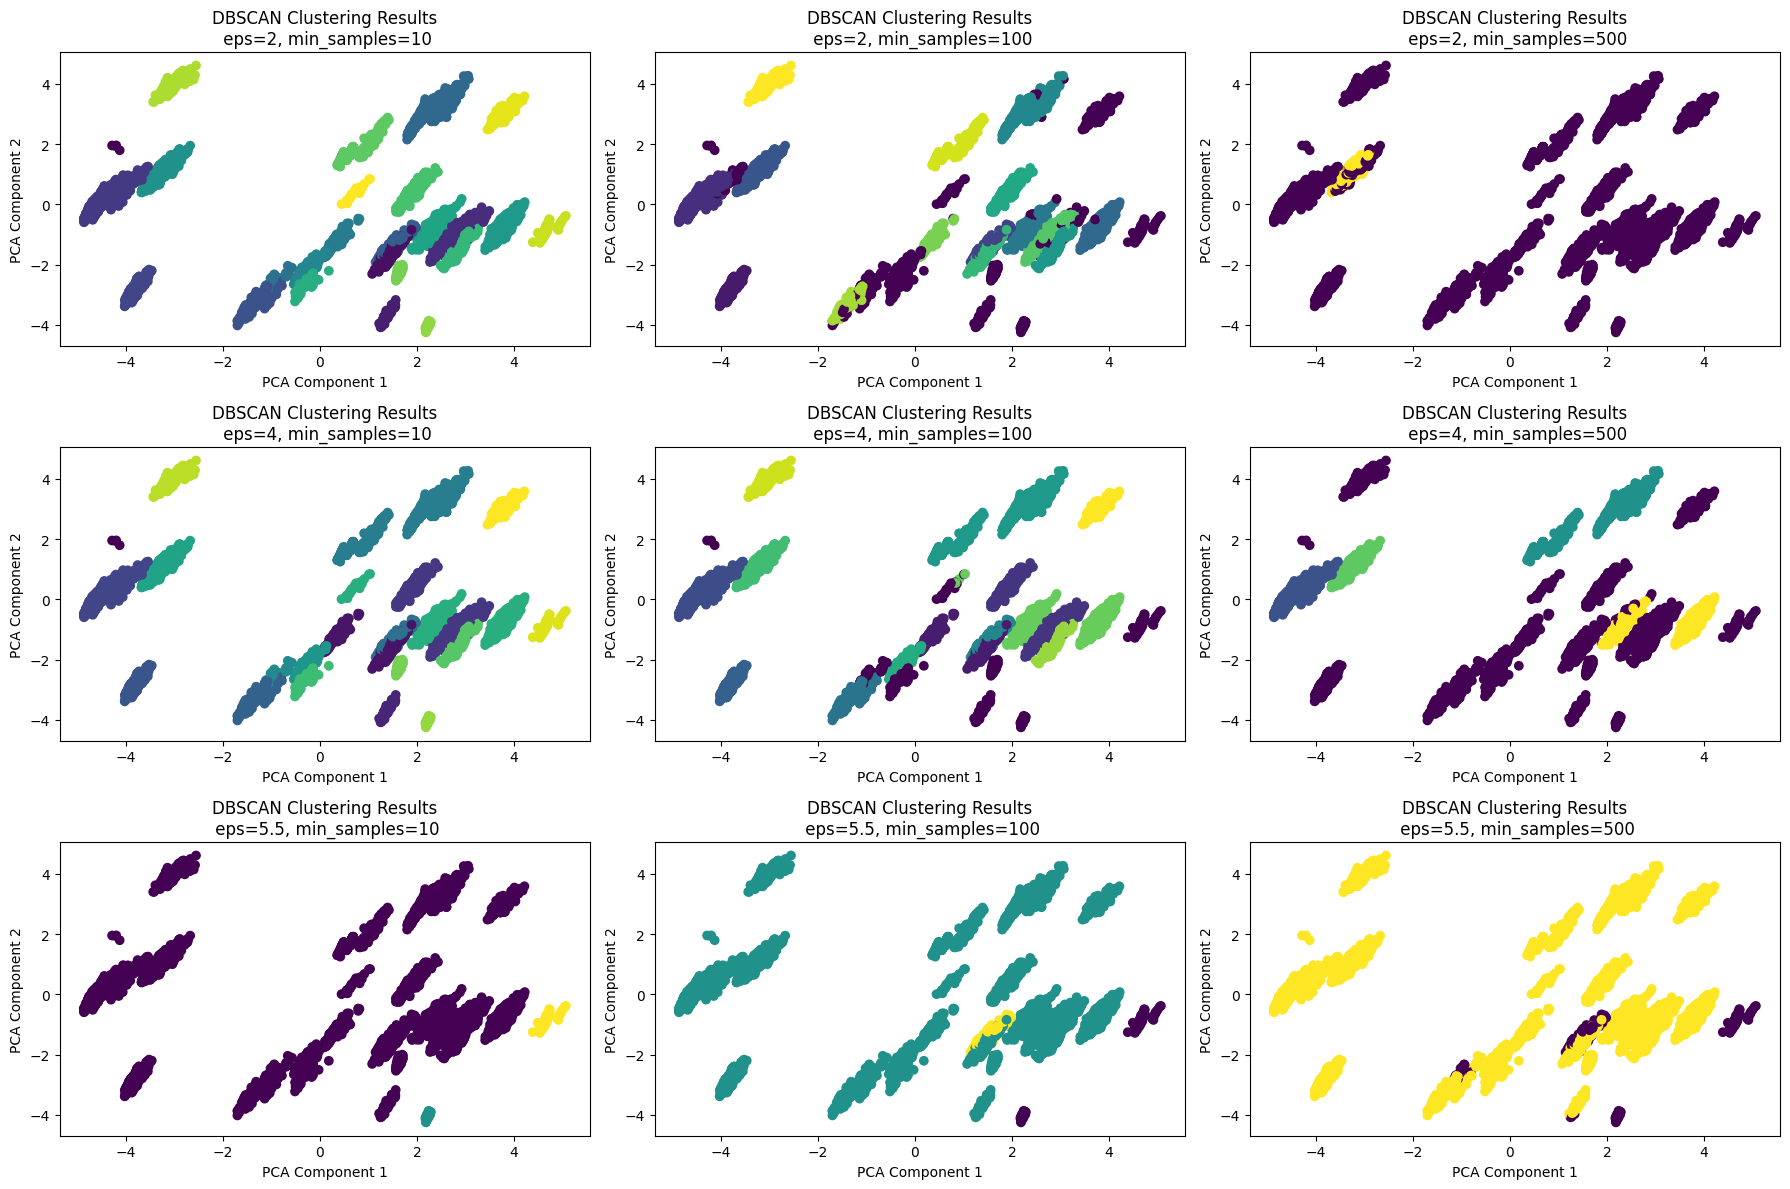

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))


for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # DBSCAN 
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        
        # PCA 
        pca = PCA(n_components=2)
        data_reduced = pca.fit_transform(data)
        
        
        labels = dbscan.labels_
        
        ax = axes[i, j]
        ax.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', marker='o')
        ax.set_title(f'DBSCAN Clustering Results\n eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')

# Adjust 
plt.tight_layout()

# Save 
plt.savefig('dbscan_comparison.png', format='png', dpi=300)
plt.show()